### **Preprocessing**

In [21]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Load the dataset
df = pd.read_csv("MidtermData.csv")

# -----------------------------------------------------------
# Inspect the data
# -----------------------------------------------------------
print("Initial shape:", df.shape)
print(df.info())
print(df.describe())

Initial shape: (2000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       2000 non-null   int64  
 1   ID               2000 non-null   int64  
 2   Sex              2000 non-null   object 
 3   Marital status   1981 non-null   object 
 4   Age              1933 non-null   float64
 5   Education        1964 non-null   object 
 6   Income           1727 non-null   float64
 7   Occupation       1988 non-null   object 
 8   Settlement size  1987 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 140.8+ KB
None
        Unnamed: 0            ID          Age         Income
count  2000.000000  2.000000e+03  1933.000000    1727.000000
mean    999.500000  1.000010e+08    36.142783  120427.197452
std     577.494589  5.774946e+02    14.873772   39599.986638
min       0.000000  1.000000e+08     2.000000    8

In [22]:
#Checking null 

df.isna().sum()

Unnamed: 0           0
ID                   0
Sex                  0
Marital status      19
Age                 67
Education           36
Income             273
Occupation          12
Settlement size     13
dtype: int64

In [23]:
#There are some spelling inconsistencies in dataset

df["Marital status"].value_counts()

Marital status
Single        999
Non-single    902
Married        78
Sinle           1
Non-singl       1
Name: count, dtype: int64

In [24]:
df["Settlement size"].value_counts()

Settlement size
Small city           937
Mid-sized city       522
Big city             449
Medium sized city     46
Mid sized city        26
Megapolis              5
Little town            2
Name: count, dtype: int64

In [25]:
# 'Unnamed: 0' is just an index column, and 'ID' is unique per person,
# so they don’t help clustering.
data = df.drop(columns=["Unnamed: 0", "ID"])

# -----------------------------------------------------------
# Fix spelling inconsistencies
# -----------------------------------------------------------
# Example: "Sinle" → "Single"
data["Marital status"] = data["Marital status"].replace("Sinle", "Single")
data["Marital status"] = data["Marital status"].replace("Non-singl", "Non-single")
data["Settlement size"] = data["Settlement size"].replace({"Little town":"Small city","Megapolis":"Big city","Mid sized city":"Mid-sized city","Medium sized city":"Mid-sized city"})

In [26]:
#100 + age is unreal in my opinion

df[df["Age"]>100]

,Unnamed: 0,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
545,545,100000546,Male,Single,433.0,High school,107099.0,Skilled employee/Official,Mid-sized city


In [27]:
data = data.drop(data["Age"][545])

In [28]:
# -----------------------------------------------------------
# Handle missing values
# -----------------------------------------------------------
# For numerical columns, use median (robust against outliers)
data["Age"] = data["Age"].fillna(data["Age"].median())
data["Income"] = data["Income"].fillna(data["Income"].median())

# For categorical columns, use mode (most frequent value)
for col in ["Sex", "Marital status", "Education", "Occupation", "Settlement size"]:
    data[col] = data[col].fillna(data[col].mode()[0])


In [29]:
data.describe()

,Age,Income
count,1999.000000,1999.000000
mean,36.039020,119746.012506
std,14.636827,36845.675682
min,2.000000,8987.000000
25%,27.000000,100778.000000
50%,33.000000,115398.000000
75%,42.000000,133255.000000
max,433.000000,484719.000000


In [30]:
#After handling there is not missing value

data.isnull().sum()

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [31]:
# -----------------------------------------------------------
#  Encode categorical features
# -----------------------------------------------------------
# We use LabelEncoder since we only need numeric form for clustering.
le = LabelEncoder()
categorical_cols = ["Sex", "Marital status", "Education", "Occupation", "Settlement size"]

for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

In [32]:
# -----------------------------------------------------------
#  Feature Scaling
# -----------------------------------------------------------
# Clustering algorithms are distance-based (e.g., KMeans),
# so we must scale numeric values for fairness.
scaler = StandardScaler()
data[["Age", "Income"]] = scaler.fit_transform(data[["Age", "Income"]])

In [33]:
# -----------------------------------------------------------
# Final clean dataset summary
# -----------------------------------------------------------
print("\n✅ Cleaned dataset info:")
print(data.info())


✅ Cleaned dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 1999 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              1999 non-null   int64  
 1   Marital status   1999 non-null   int64  
 2   Age              1999 non-null   float64
 3   Education        1999 non-null   int64  
 4   Income           1999 non-null   float64
 5   Occupation       1999 non-null   int64  
 6   Settlement size  1999 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 124.9 KB
None


In [14]:
# Save processed data (optional)
data.to_csv("Processed_Midterm_Dataaa.csv", index=False)

### **EDAs**

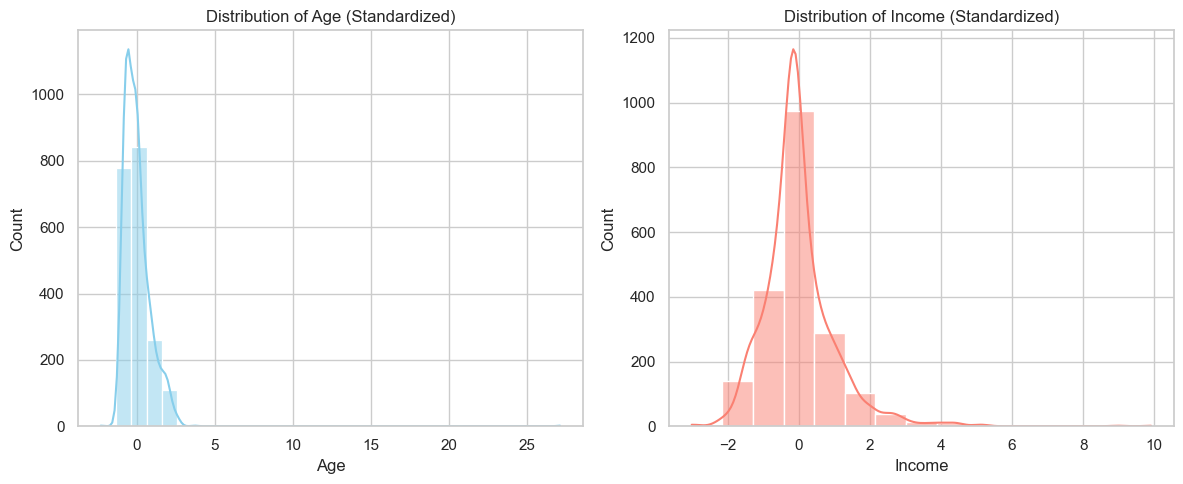

In [14]:
# -----------------------------------------------------------
# CUSTOMER SEGMENTATION - EXPLORATORY DATA ANALYSIS (EDA)
# -----------------------------------------------------------

import matplotlib.pyplot as plt
import seaborn as sns

# Use a consistent style for visuals
sns.set(style="whitegrid", palette="pastel")


# -----------------------------------------------------------
# Distribution of Numerical Features
# -----------------------------------------------------------
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data["Age"], kde=True, bins=30, color="skyblue")
plt.title("Distribution of Age (Standardized)")

plt.subplot(1, 2, 2)
sns.histplot(data["Income"], kde=True, bins=15, color="salmon")
plt.title("Distribution of Income (Standardized)")

plt.tight_layout()
plt.show()



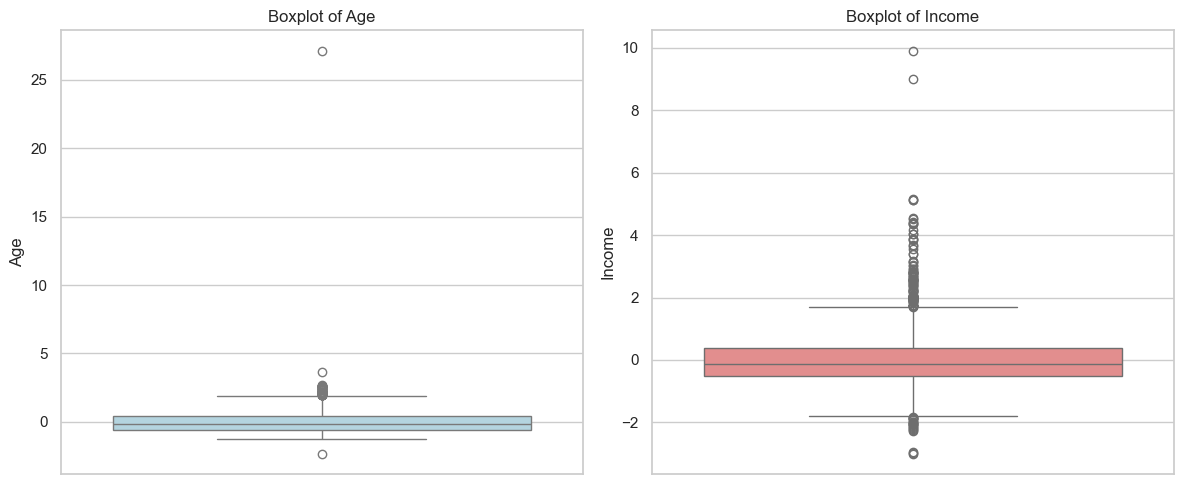

In [15]:
# -----------------------------------------------------------
#  Boxplots for Outlier Detection
# -----------------------------------------------------------
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=data["Age"], color="lightblue")
plt.title("Boxplot of Age")

plt.subplot(1, 2, 2)
sns.boxplot(y=data["Income"], color="lightcoral")
plt.title("Boxplot of Income")

plt.tight_layout()
plt.show()



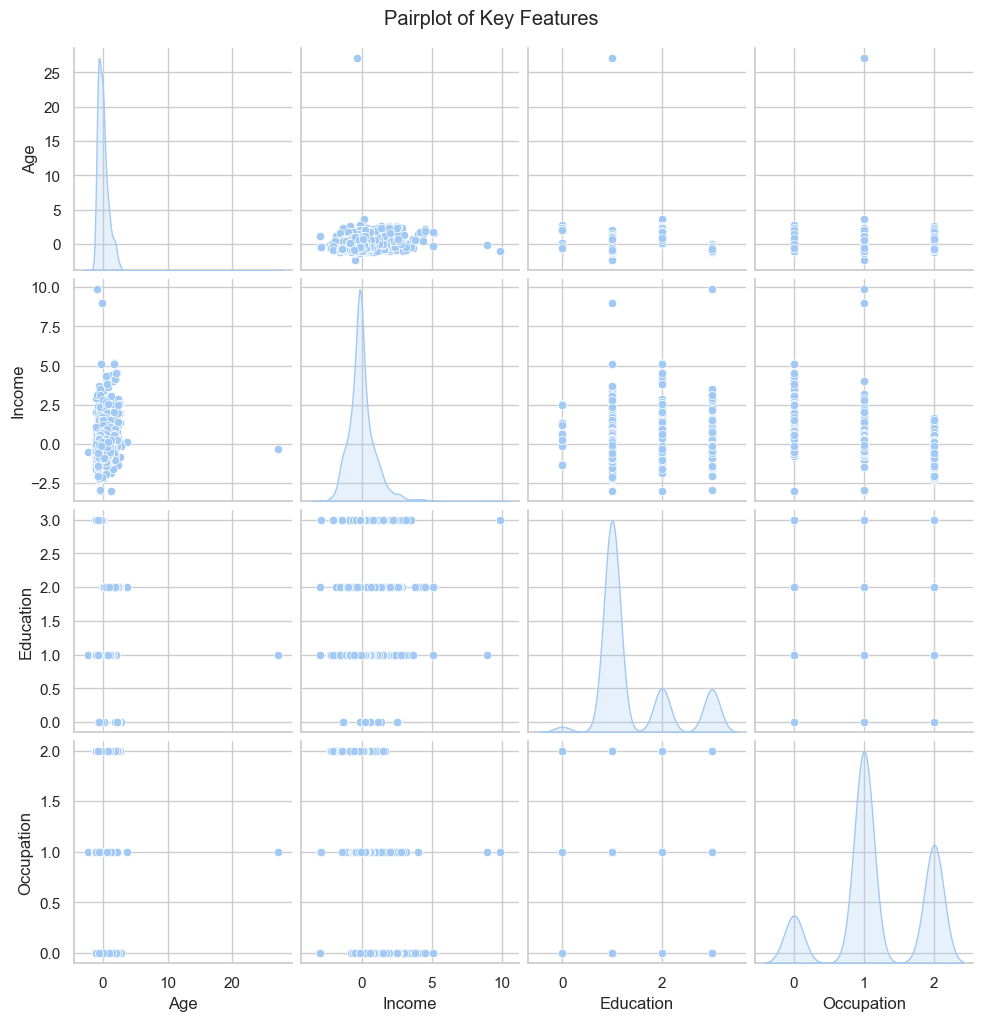

In [16]:
# -----------------------------------------------------------
# Pairplot to See Relationships Between Features
# -----------------------------------------------------------
# Focus on key numeric variables to reduce clutter
sns.pairplot(data[["Age", "Income", "Education", "Occupation"]], diag_kind="kde")
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()

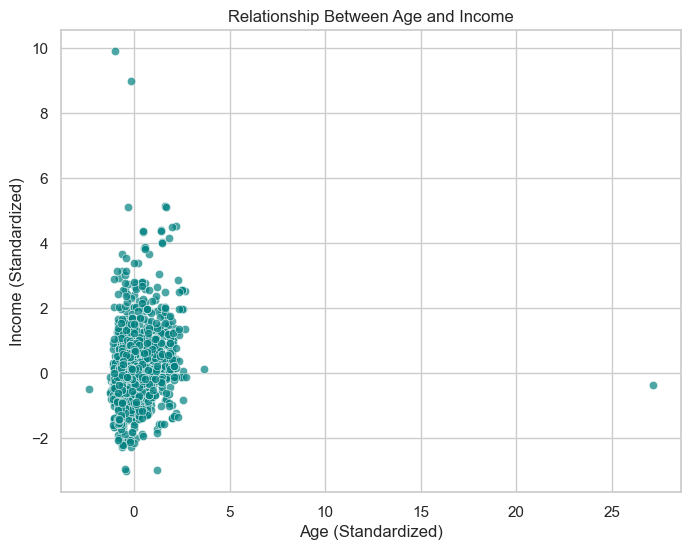

In [17]:
# -----------------------------------------------------------
#  Relationship Between Age and Income
# -----------------------------------------------------------
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Age", y="Income", data=data, alpha=0.7, color="teal")
plt.title("Relationship Between Age and Income")
plt.xlabel("Age (Standardized)")
plt.ylabel("Income (Standardized)")
plt.show()

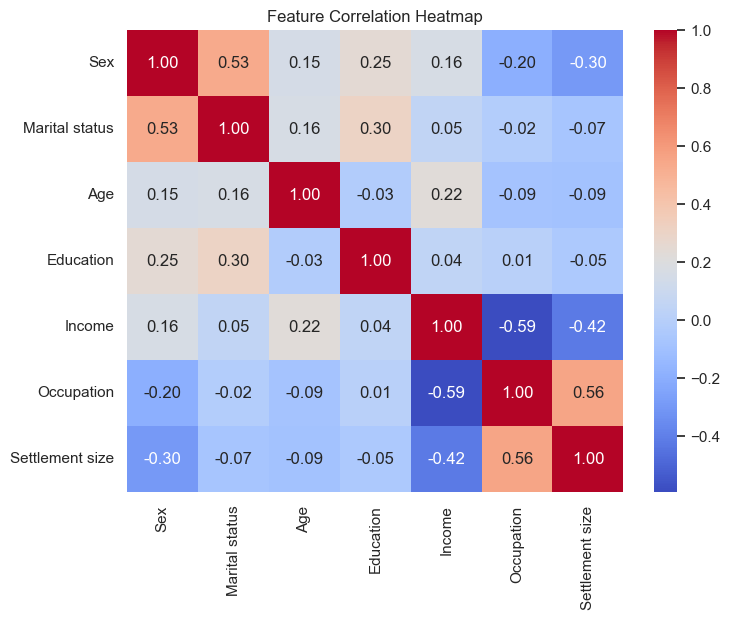

In [18]:
# -----------------------------------------------------------
#  Correlation Heatmap
# -----------------------------------------------------------
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

### **Clustering**

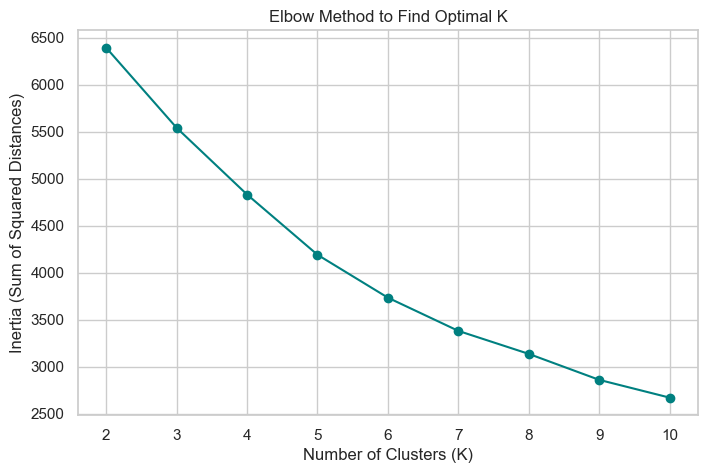

In [34]:
# -----------------------------------------------------------
# CUSTOMER SEGMENTATION - K-MEANS CLUSTERING
# -----------------------------------------------------------

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Use the preprocessed dataset
X = data.copy()

# -----------------------------------------------------------
# Find the optimal number of clusters using the Elbow Method
# -----------------------------------------------------------

inertia_values = []  # measures compactness (lower = better, but not too low)
K = range(2, 11)     # test for K between 2 and 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia_values, marker='o', color='teal')
plt.title("Elbow Method to Find Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.show()




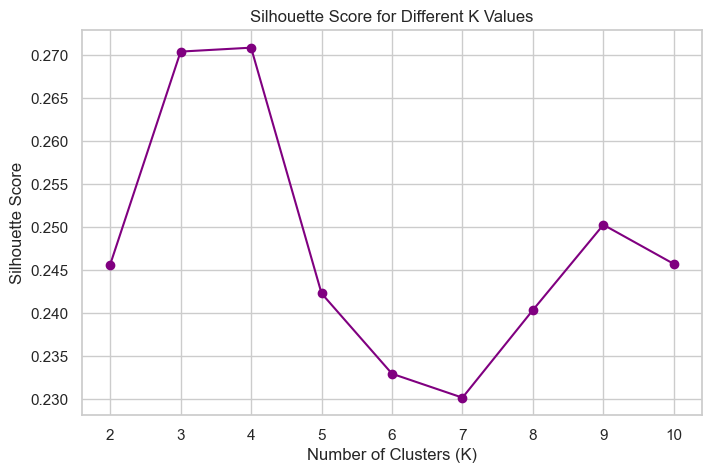

In [35]:
# -----------------------------------------------------------
#  Evaluate cluster quality using Silhouette Scores
# -----------------------------------------------------------

silhouette_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, marker='o', color='purple')
plt.title("Silhouette Score for Different K Values")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()

In [36]:
# -----------------------------------------------------------
#  Choose best K based on both graphs
# -----------------------------------------------------------
# The highest silhouette value often indicate the best number of clusters.

best_k = 4  # Example choice — adjust based on your elbow & silhouette graphs

# Train final KMeans model
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
data["Cluster"] = kmeans.fit_predict(X)

# -----------------------------------------------------------
# Analyze and describe each cluster
# -----------------------------------------------------------

cluster_summary = data.groupby("Cluster").mean()
print("\nCluster Summary (mean of each feature):")
print(cluster_summary)



Cluster Summary (mean of each feature):
              Sex  Marital status        Age  Education    Income  Occupation  \
Cluster                                                                         
0        0.313360        1.274067  -0.190629   1.088409 -0.462383    1.504912   
1        0.742978        1.551966   0.454487   1.268258  0.774636    0.700843   
2        0.880597        2.000000  -0.584559   2.996269 -0.300339    1.272388   
3        1.000000        2.000000  27.127485   1.000000 -0.343329    1.000000   

         Settlement size  
Cluster                   
0               1.717092  
1               0.577247  
2               1.253731  
3               1.000000  


In [37]:
data

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
0,1,2,3.687581,2,0.133672,1,0,1
1,0,1,-0.959397,1,0.842290,1,0,1
2,1,2,0.885726,1,-0.828962,2,2,0
3,1,2,0.612375,1,1.406731,1,1,1
4,1,2,1.159078,1,0.795000,1,1,1
...,...,...,...,...,...,...,...,...
1995,0,2,0.749051,1,0.102588,2,2,0
1996,0,1,-0.617708,1,-0.054349,1,2,0
1997,1,2,-0.344356,3,-0.118036,2,2,2
1998,0,1,-0.822721,1,-0.591208,2,2,0


### **Clustering visualizations**

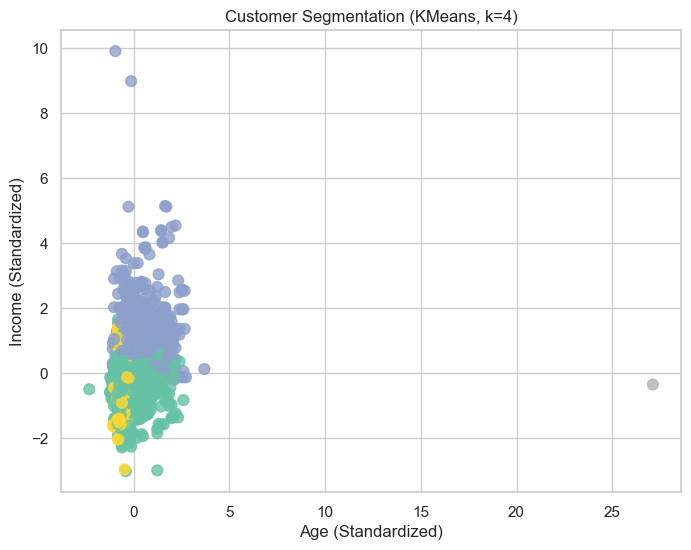

In [29]:
# -----------------------------------------------------------
# Visualize clusters using 2 main features (Age & Income)
# -----------------------------------------------------------

plt.figure(figsize=(8, 6))
plt.scatter(data["Age"], data["Income"], c=data["Cluster"], cmap="Set2", s=60, alpha=0.8)
plt.title(f"Customer Segmentation (KMeans, k={best_k})")
plt.xlabel("Age (Standardized)")
plt.ylabel("Income (Standardized)")
plt.show()

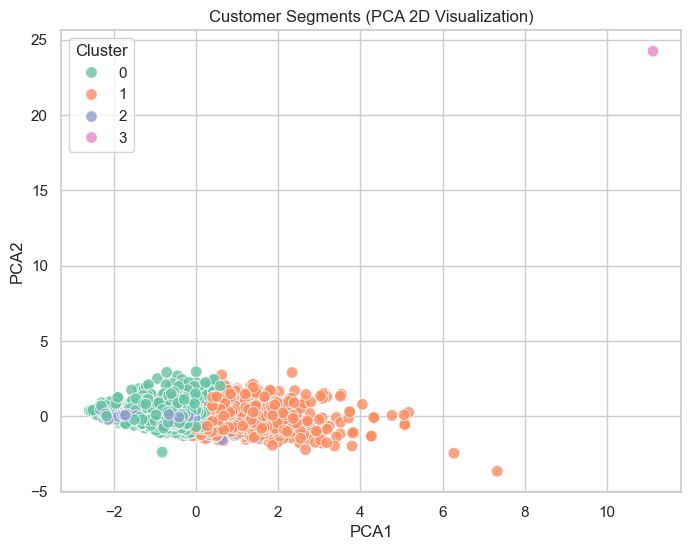

In [30]:
# -----------------------------------------------------------
# PCA Visualization (2D projection of all features)
# -----------------------------------------------------------
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

X_features = data.drop("Cluster", axis=1) #Because cluster column is not an original feature of the customer.

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_features)

data["PCA1"] = pca_result[:, 0]
data["PCA2"] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="PCA1", y="PCA2",
    hue="Cluster",
    data=data,
    palette="Set2",
    s=70, alpha=0.8
)
plt.title("Customer Segments (PCA 2D Visualization)")
plt.show()


C:\Users\ismay\AppData\Local\Temp\ipykernel_18452\3893634825.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Cluster", data=data, palette="Set2")


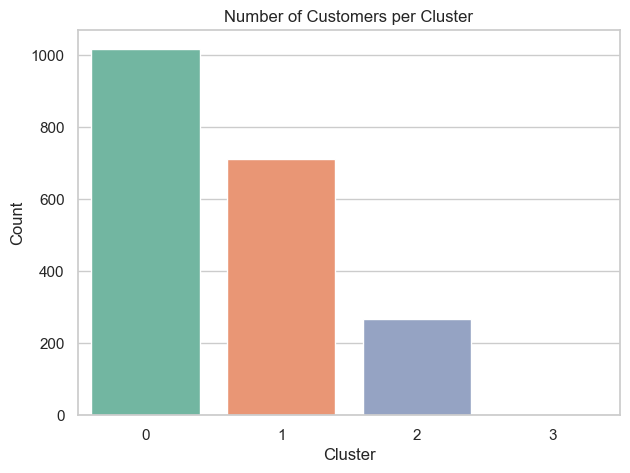

In [31]:
# -----------------------------------------------------------
# Number of Customers in Each Cluster
# -----------------------------------------------------------
plt.figure(figsize=(7, 5))
sns.countplot(x="Cluster", data=data, palette="Set2")
plt.title("Number of Customers per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

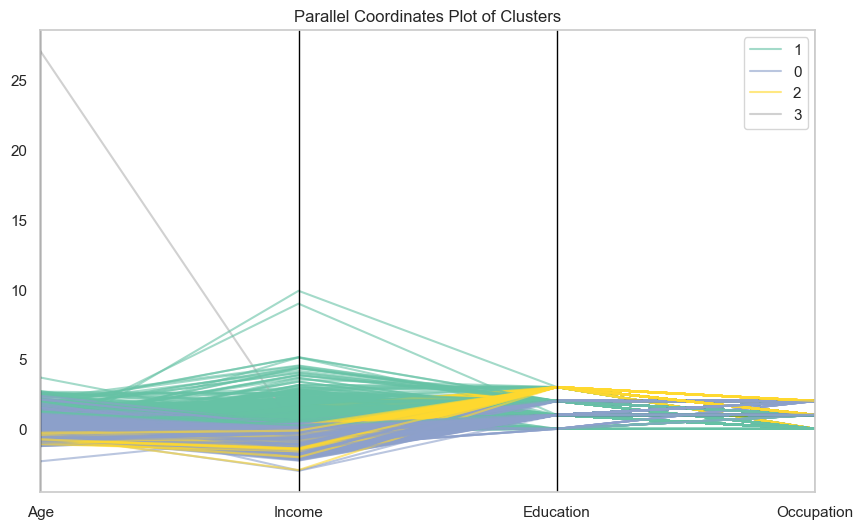

In [32]:
# -----------------------------------------------------------
# Parallel Coordinates Plot
# -----------------------------------------------------------
from pandas.plotting import parallel_coordinates

# Select smaller feature subset for clarity
subset = data[["Age", "Income", "Education", "Occupation", "Cluster"]]

plt.figure(figsize=(10, 6))
parallel_coordinates(subset, "Cluster", colormap="Set2", alpha=0.6)
plt.title("Parallel Coordinates Plot of Clusters")
plt.show()
